## Project Goal
- Predict the likelihood of a customer defaulting on their load

## 
1 Status 	credit status
2 Seniority 	job seniority (years)
3 Home 	type of home ownership
4 Time 	time of requested loan
5 Age 	client's age
6 Marital 	marital status
7 Records 	existance of records
8 Job 	type of job
9 Expenses 	amount of expenses
10 Income 	amount of income
11 Assets 	amount of assets
12 Debt 	amount of debt
13 Amount 	amount requested of loan
14 Price 	price of good

## Importing Libraries

In [125]:
## loading and preprocessing data
import pandas as pd
import numpy as np

## visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

## 
from sklearn.model_selection import train_test_split

## Dowloading And Loading The Datasets

In [126]:
#url = "https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv"

#!wget $url 

In [127]:
df = pd.read_csv('CreditScoring.csv')

In [128]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [129]:
## normalize the columns names to lowercase
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [130]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [131]:
## lets replace numeric categorical values with strings
status = {1: "default", 2: "ok", 0: "unk"}

df.status = df.status.map(status)

In [132]:
df.home.value_counts()

2    2107
1     973
5     783
6     319
3     247
4      20
0       6
Name: home, dtype: int64

In [133]:
home = {1: "rent", 2: "owner", 3: "priv", 4: "ignore", 5: "parents", 0: "other"}

df.home = df.home.map(home)

In [134]:
df.marital.value_counts()

2    3241
1     978
4     130
3      67
5      38
0       1
Name: marital, dtype: int64

In [135]:
marital = {1: "single", 2: "married", 3: "widow", 4: "separated", 5: "divorced", 0: "unk"}

df.marital = df.marital.map(marital)

In [136]:
df.records.value_counts()

1    3682
2     773
Name: records, dtype: int64

In [137]:
records = {1: "no_rec", 2: "yes_rec"}

df.records = df.records.map(records)

In [138]:
df.job.value_counts()

1    2806
3    1024
2     452
4     171
0       2
Name: job, dtype: int64

In [139]:
jobs = {1: "fixed", 2: "partime", 3: "freelance", 4: "others", 0: "unk"}
df.job = df.job.map(jobs)

In [140]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,default,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,default,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,ok,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,default,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,default,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


In [141]:
## summary stats of the dataframe
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [142]:
for c in ["income", "assets", "debt"]:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [143]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [144]:
## lets remove the un]known records in our dataset
[df.status != "unk"]

[0       True
 1       True
 2       True
 3       True
 4       True
         ... 
 4450    True
 4451    True
 4452    True
 4453    True
 4454    True
 Name: status, Length: 4455, dtype: bool]

## Build A Validation Framework


In [145]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=42)

print(f"Training size {len(df_train)}")
print(f"Validation size {len(df_valid)}")
print(f"Testing size {len(df_test)}")

Training size 2673
Validation size 891
Testing size 891


In [146]:
y_train = (df_train.status == "default").values
y_valid = (df_valid.status == "default").values


In [147]:
del df_train['status']
del df_valid['status']


## Build A Decision Tree Model 

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [149]:
df_train.isnull().sum()

seniority      0
home         204
time           0
age            0
marital        0
records        0
job            0
expenses       0
income        21
assets        26
debt           7
amount         0
price          0
dtype: int64

In [150]:
## lets fill in missing values with zeros
df_train = df_train.fillna(0)
df_valid = df_valid.fillna(0)

## convert categorical data to numerical 
dict_train = df_train.to_dict(orient='records')
dict_valid = df_valid.to_dict(orient='records')

## 
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_valid = dv.transform(dict_valid)

In [151]:
len(X_train), len(y_train)

(2673, 2673)

In [152]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [153]:
y_pred_train = clf_tree.predict_proba(X_train)[:,1]
y_pred_train


array([1., 1., 1., ..., 1., 1., 1.])

In [154]:
roc_auc_score(y_train, y_pred_train)

0.9999996450431698

In [155]:
## generate predictions on the validation set
y_pred_valid = clf_tree.predict_proba(X_valid)[:,1]

In [156]:
roc_auc_score(y_valid, y_pred_valid)

0.6652647127900221

In [157]:
clf_tree = DecisionTreeClassifier(max_depth=3)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [158]:
y_pred_train = clf_tree.predict_proba(X_train)[:,1]

roc_auc_score(y_train, y_pred_train)

0.7783638903836516

In [159]:
y_pred_valid = clf_tree.predict_proba(X_valid)[:,1]

auc = roc_auc_score(y_valid, y_pred_valid)

print(f"Validation Accuracy: {auc}")

Validation Accuracy: 0.7359701603233662


### Tunning the Parameters Decision Trees

In [160]:
## 

depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, None]
for depth in depths:
    clf_tree_4 = DecisionTreeClassifier(max_depth=depth)
    clf_tree_4.fit(X_train, y_train)

    y_pred_valid = clf_tree_4.predict_proba(X_valid)[:,1]
    auc = roc_auc_score(y_valid, y_pred_valid)

    print(f"{depth} -> {round(auc,3)}")

1 -> 0.598
2 -> 0.669
3 -> 0.736
4 -> 0.736
5 -> 0.75
6 -> 0.753
7 -> 0.723
8 -> 0.718
9 -> 0.696
10 -> 0.671
15 -> 0.67
20 -> 0.667
None -> 0.664


In [161]:
## lets select the best 3 
scores = []
depths = [4,5,6]
leafs = [1, 5, 10, 15, 20, 30, 40, 50, 100, 200]

for depth in depths:
    for leaf in leafs:
        clf_tree_4 = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf)
        clf_tree_4.fit(X_train, y_train)

        y_pred_valid = clf_tree_4.predict_proba(X_valid)[:,1]
        auc = roc_auc_score(y_valid, y_pred_valid)

        scores.append((depth, leaf, round(auc, 3)))
        #print(f"{depth}  -> {leaf}  -> {round(auc,3)}")
        



In [162]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by='auc', ascending=False)[:10]

,max_depth,min_samples_leaf,auc
27,6,50,0.769
26,6,40,0.768
28,6,100,0.766
25,6,30,0.766
15,5,30,0.765
16,5,40,0.765
18,5,100,0.763
19,5,200,0.762
29,6,200,0.762
17,5,50,0.761


In [163]:
## train final decision tree model
clf_tree_5 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=40)
clf_tree_5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=40)

### Implementing Gradient Boosting
- 

In [164]:
import xgboost as xgb

In [165]:
features = dv.get_feature_names()
d_train = xgb.DMatrix(X_train, label=y_train, feature_names=features)
d_valid = xgb.DMatrix(X_valid, label=y_valid, feature_names=features)

/home/moro/.local/share/virtualenvs/ml_zoomcamp_2022-ud0q1_0T/lib64/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [166]:
xgb_param = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_param, d_train, num_boost_round=10)

In [167]:
y_pred_valid = model.predict(d_valid)

In [168]:
roc_auc_score(y_valid, y_pred_valid)

0.8096669921754286

In [169]:
watch_list = [(d_train, 'trian'), (d_valid, 'valid')]

In [170]:
%%capture output

xgb_param = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_param, d_train, num_boost_round=200, verbose_eval=5, evals=watch_list)

In [171]:
s = output.stdout

In [172]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, valid_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        valid = float(valid_line.split(':')[1])

        results.append((it, train, valid))

        columns = ['num_iter', 'train_auc', 'valid_auc']
        
    return pd.DataFrame(results, columns=columns)


In [173]:
df_score = parse_xgb_output(output)

In [174]:
df_score.head()

,num_iter,train_auc,valid_auc
0,0,0.85869,0.75823
1,5,0.92854,0.80587
2,10,0.95255,0.80784
3,15,0.96565,0.81550
4,20,0.97300,0.81517


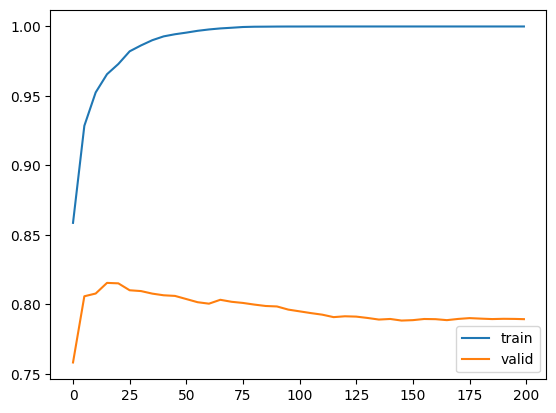

In [175]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.valid_auc, label='valid')

plt.legend()

### XGBoost Parameter Tuning 
- eta
- max_depth
- min_child_weight

In [176]:
 scores = {}

In [177]:
%%capture output 

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, d_train, num_boost_round=200, verbose_eval=5, evals=watch_list)

In [178]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [179]:
scores.keys()

dict_keys(['eta=0.01'])

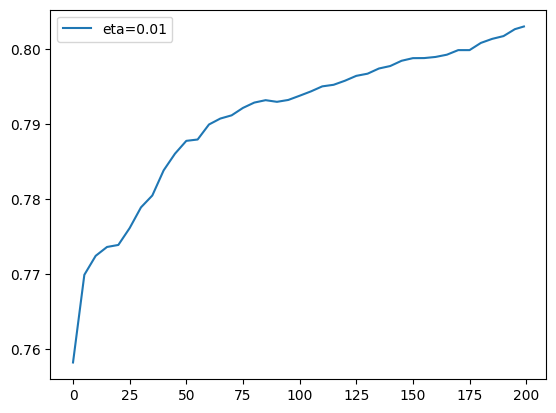

In [180]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.valid_auc, label=key)
plt.legend()

In [181]:
scores = {}

In [182]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity':1,
}

model = xgb.train(xgb_params, d_train, num_boost_round=200, verbose_eval=5, evals=watch_list)

In [183]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

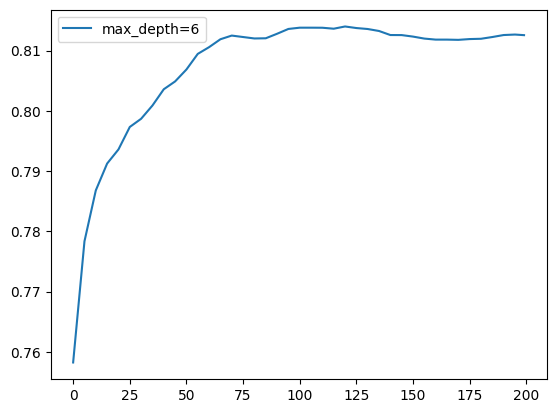

In [184]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.valid_auc, label=key)
plt.legend()

In [185]:
scores = {}

In [186]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity':1,
}

model = xgb.train(xgb_params, d_train, num_boost_round=200, verbose_eval=5, evals=watch_list)

In [187]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

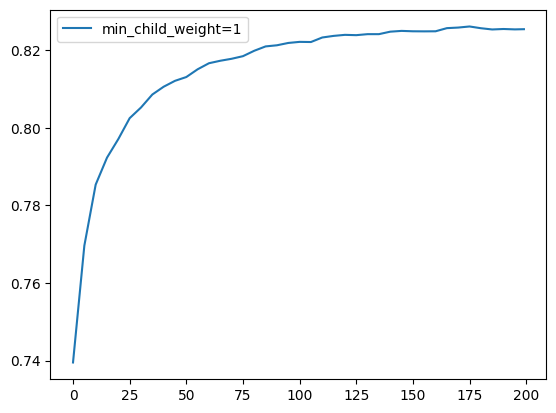

In [188]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.valid_auc, label=key)
plt.legend()

### Train Final Model

In [189]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity':1,
}

model = xgb.train(xgb_params, d_train, num_boost_round=175, verbose_eval=5, evals=watch_list)

In [190]:
y_pred_valid = model.predict(d_valid)
roc_auc_score(y_valid, y_pred_valid)

0.8324639365134303

### Train Model 

In [191]:
y_train_full = (df_train_full.status == 'default').astype(int).values
y_test = (df_test.status == "default").values


In [192]:
del df_train_full['status']
del df_test['status']

In [193]:
df_train_full.isnull().sum()


seniority      0
home         272
time           0
age            0
marital        0
records        0
job            0
expenses       0
income        29
assets        40
debt          15
amount         0
price          0
dtype: int64

In [194]:
df_test.isnull().sum()

seniority     0
home         47
time          0
age           0
marital       0
records       0
job           0
expenses      0
income        5
assets        7
debt          3
amount        0
price         0
dtype: int64

In [195]:
df_train_full = df_train_full.fillna(0)
df_test = df_test.fillna(0)

In [197]:
dict_train_full = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')


In [199]:
dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dict_train_full)

X_test = dv.transform(dict_test)



In [203]:
d_train_full = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=dv.get_feature_names())
d_test = xgb.DMatrix(X_test, label=y_test, feature_names=dv.get_feature_names())

/home/moro/.local/share/virtualenvs/ml_zoomcamp_2022-ud0q1_0T/lib64/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [205]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity':1,
}

model = xgb.train(xgb_params, d_train_full, num_boost_round=175)

In [206]:
y_pred_test = model.predict(d_test)

In [207]:
roc_auc_score(y_test, y_pred_test)

0.8508972286644646